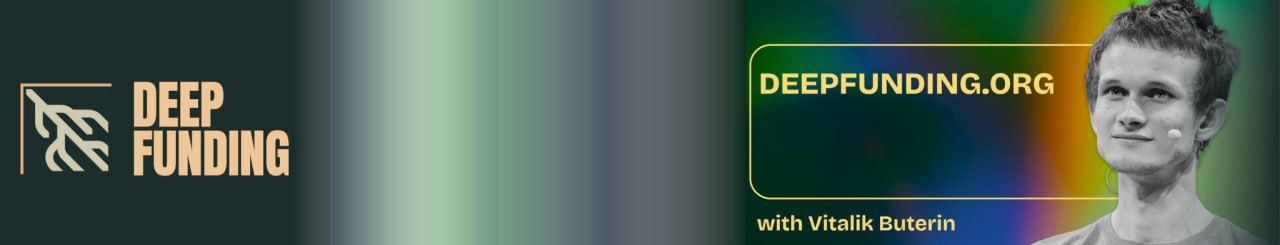

# Welcome to the DeepFunding Mini Tutorial

Maintained by the [Eval.Science]("https://eval.science") Team

Contact: david@gainforest.net

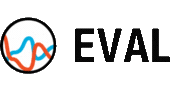

# About DeepFunding 🔍

DeepFunding Mini is a [mini-contest](https://huggingface.co/spaces/DeepFunding/PredictiveFundingChallengeforOpenSourceDependencies) to create a distilled human judgment mechanism predicting the amount of funding that should be received by open source projects.

## 📦 Data

The mini dataset represents pairs of GitHub repositories taken from the [Ethereum dependency graph](https://github.com/deepfunding/dependency-graph) and their funding amounts in historical funding rounds data.

- **Training Data:** 3,410 comparisons between 245 repos, 2,387 provided for training
- **Test Data:** 1,023 predictions on the relative funding received between any 2 projects, which get tested against actual data

**HuggingFace Dataset:** [evalscience/deepfunding-mini](https://huggingface.co/datasets/evalscience/deepfunding-mini)

## 🎯 Goal

Predict the relative funding received between pairs of projects. Each comparison should output a relative value between repositories that sums to 1.

## 🏆 Prizes

Winners receive up to $20,000 based on:
- Novelty and approach in predicting 1,023 comparisons  
- Infrastructure and datasets created

**Evaluation Metric:** Mean Squared Error (MSE) - lower is better, but avoid overfitting on the public leaderboard. Note: Current labels are weakly supervised.

**Important:** Submission weights must maintain transitivity:
- For any triple _a_, _b_, _c_: `c/a = c/b * b/a`
- Example: If A gets twice as much as B, and B gets three times as much as C, then A must be six times better than C

## 🏛 Learn More with Eval.Science

Join us at [Eval.Science](https://eval.science) to become part of the next generation of decentralized data scientists tackling important problems like DeepFunding.

**Quick Links:**
- [🎥 YouTube Channel](https://www.youtube.com/@evalscience)
- [📚 Lecture Notes (WIP)](https://docs.eval.science)
- [🤗 Hugging Face Space](https://huggingface.co/spaces/DeepFunding/PredictiveFundingChallengeforOpenSourceDependencies)
- [📊 GitHub Dependency Graph](https://github.com/deepfunding/dependency-graph)
- [💻 Eval.Science Website](https://eval.science)

## 📈 Baselines

| Metric  | MSE |
|---------|-----|
| Random  | 0.12502730425363476 |
| Stars   | 0.19531555755620916 |
| Forks   | 0.1874321641202411  |
| Funding | 0.08316942192812525 |

## 🚚 Data Loader

The original competition dataset had columns `project_a`, `project_b`, `weight_a` and `weight_b`, where the weights are considered as labels.

Our team has enriched the initial dataset by joining OSO's parquet data with the github repo urls. Explore the features below.

In [3]:
import polars as pl
splits = {'train': 'train.parquet', 'test': 'test.parquet'}
df_train_data = pl.read_parquet('hf://datasets/evalscience/deepfunding-mini/' + splits['train'])
df_train_data

id,project_a,project_b,weight_a,weight_b,maintainer_a,language_a,is_fork_a,created_at_a,updated_at_a,star_count_a,fork_count_a,num_packages_a,num_dependents_in_oso_a,list_of_dependents_in_oso_a,list_of_packages_a,list_of_funders_a,total_funding_usd_a,total_funding_usd_since_2023_a,oso_dependency_rank_a,num_repos_in_same_language_a,oso_dependency_rank_for_language_a,maintainer_b,language_b,is_fork_b,created_at_b,updated_at_b,star_count_b,fork_count_b,num_packages_b,num_dependents_in_oso_b,list_of_dependents_in_oso_b,list_of_packages_b,list_of_funders_b,total_funding_usd_b,total_funding_usd_since_2023_b,oso_dependency_rank_b,num_repos_in_same_language_b,oso_dependency_rank_for_language_b
i64,str,str,f64,f64,str,str,bool,date,date,i64,i64,i64,i64,list[str],list[str],list[str],f64,f64,f64,i64,f64,str,str,bool,date,date,i64,i64,i64,i64,list[str],list[str],list[str],f64,f64,f64,i64,f64
2,"""https://github.com/prettier-so…","""https://github.com/nomicfounda…",0.101669,0.898331,"""prettier-solidity""","""Solidity""",false,2018-05-15,2024-12-10,729,75,2,655,"[""kleros"", ""dm3-org"", … ""artgenexyz""]","[""NPM/prettier-plugin-solidity"", ""NPM/@134dd3v/prettier-plugin-solidity""]","[""Optimism"", ""Gitcoin""]",399514.463016,390107.450998,0.550289,3,0.5,"""nomicfoundation""","""TypeScript""",false,2018-04-14,2024-12-18,7385,1437,12,757,"[""ora-io"", ""levi0214"", … ""aurafinance""]","[""NPM/@nomicfoundation/hardhat-web3-v4"", ""NPM/@nomicfoundation/hardhat-ethers"", … ""NPM/@nomicfoundation/hardhat-ledger""]","[""Gitcoin"", ""Optimism""]",1.1962e6,981156.590309,0.576301,239,0.554622
3,"""https://github.com/prettier-so…","""https://github.com/consensys/t…",0.669446,0.330554,"""prettier-solidity""","""Solidity""",false,2018-05-15,2024-12-10,729,75,2,655,"[""kleros"", ""dm3-org"", … ""artgenexyz""]","[""NPM/prettier-plugin-solidity"", ""NPM/@134dd3v/prettier-plugin-solidity""]","[""Optimism"", ""Gitcoin""]",399514.463016,390107.450998,0.550289,3,0.5,"""consensys""","""Java""",false,2018-09-07,2024-12-19,692,298,0,0,[],[],"[""Gitcoin"", ""Optimism""]",120767.822474,117300.0,0.0,2,0.0
4,"""https://github.com/prettier-so…","""https://github.com/ethereum/so…",0.449022,0.550978,"""prettier-solidity""","""Solidity""",false,2018-05-15,2024-12-10,729,75,2,655,"[""kleros"", ""dm3-org"", … ""artgenexyz""]","[""NPM/prettier-plugin-solidity"", ""NPM/@134dd3v/prettier-plugin-solidity""]","[""Optimism"", ""Gitcoin""]",399514.463016,390107.450998,0.550289,3,0.5,"""ethereum""","""C++""",false,2015-08-17,2024-12-19,23573,5864,0,0,[],[],"[""Gitcoin"", ""Optimism""]",2.1646e6,2.1646e6,0.0,11,0.0
5,"""https://github.com/prettier-so…","""https://github.com/ethereum/re…",0.498396,0.501604,"""prettier-solidity""","""Solidity""",false,2018-05-15,2024-12-10,729,75,2,655,"[""kleros"", ""dm3-org"", … ""artgenexyz""]","[""NPM/prettier-plugin-solidity"", ""NPM/@134dd3v/prettier-plugin-solidity""]","[""Optimism"", ""Gitcoin""]",399514.463016,390107.450998,0.550289,3,0.5,"""ethereum""","""TypeScript""",false,2020-03-20,2024-12-19,2522,999,7,14,"[""artblocks"", ""starboard-ventures"", … ""okx""]","[""NPM/@remix-project/remixd"", ""NPM/@remix-project/remix-solidity"", … ""NPM/@remix-project/remix-simulator""]","[""Gitcoin"", ""Optimism""]",1.1093e6,1.1093e6,0.190751,239,0.063025
6,"""https://github.com/prettier-so…","""https://github.com/ethereum/go…",0.272503,0.727497,"""prettier-solidity""","""Solidity""",false,2018-05-15,2024-12-10,729,75,2,655,"[""kleros"", ""dm3-org"", … ""artgenexyz""]","[""NPM/prettier-plugin-solidity"", ""NPM/@134dd3v/prettier-plugin-solidity""]","[""Optimism"", ""Gitcoin""]",399514.463016,390107.450998,0.550289,3,0.5,"""ethereum""","""Go""",false,2013-12-26,2024-12-19,47933,20331,1,238,"[""okx"", ""gorosen"", … ""jefetoken""]","[""GO/github.com/ethereum/go-ethereum""]","[""Optimism"", ""Gitcoin""]",2.6573e6,2.4962e6,0.382081,325,0.990741
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
3402,"""https://github.com/grand

## 📈 Baselines

In the following section, we host current baselines for the mini competition.

| Metric | Mean Squared Error (MSE) |
|---------|-------|
| Random | 0.12502730425363476 |
| Stars | 0.19531555755620916 |
| Forks | 0.1874321641202411 |
| Funding | 0.08316942192812525 |

In [4]:
df_train_data = df_train_data.with_columns(
    (pl.lit(0.5).alias("random")), # A random baseline where all entries are 0.5
    (pl.col("star_count_a") / (pl.col("star_count_a") + pl.col("star_count_b"))).alias("stars_ratio"), # The github star ratio
    (pl.col("fork_count_a") / (pl.col("fork_count_a") + pl.col("fork_count_b"))).alias("forks_ratio"), # The github fork ratio
    (pl.col("total_funding_usd_a") / (pl.col("total_funding_usd_a") + pl.col("total_funding_usd_b"))).alias("funding_ratio"), # The total funding ratio
)

In [6]:
from sklearn.metrics import mean_squared_error

print(f"Random MSE: {mean_squared_error(df_train_data['weight_a'], df_train_data['random'])}")
print(f"Stars MSE: {mean_squared_error(df_train_data['weight_a'], df_train_data['stars_ratio'])}")
print(f"Forks MSE: {mean_squared_error(df_train_data['weight_a'], df_train_data['forks_ratio'])}")
print(f"Funding MSE: {mean_squared_error(df_train_data['weight_a'], df_train_data['funding_ratio'])}")

Random MSE: 0.12502730425363476
Stars MSE: 0.19531555755620916
Forks MSE: 0.1874321641202411
Funding MSE: 0.08316942192812525


## Submit your prediction

In [9]:
# Load the Test Data
df_test_data = pl.read_parquet('hf://datasets/evalscience/deepfunding-mini/' + splits['test'])

In [10]:
# Calculate the Github Star Ratio
df_test_data = df_test_data.with_columns(
    (pl.col("star_count_a") / (pl.col("star_count_a") + pl.col("star_count_b"))).alias("stars_ratio"),
)
y_pred = df_test_data.select(pl.col("id"), pl.col("stars_ratio").alias("pred"))

In [12]:
# Write the Submission File
y_pred.write_csv('stars-funding-ratio-27-12-24.csv')

Download your file from the sidebar, create a HuggingFace account and submit your csv here: https://huggingface.co/spaces/DeepFunding/PredictiveFundingChallengeforOpenSourceDependencies



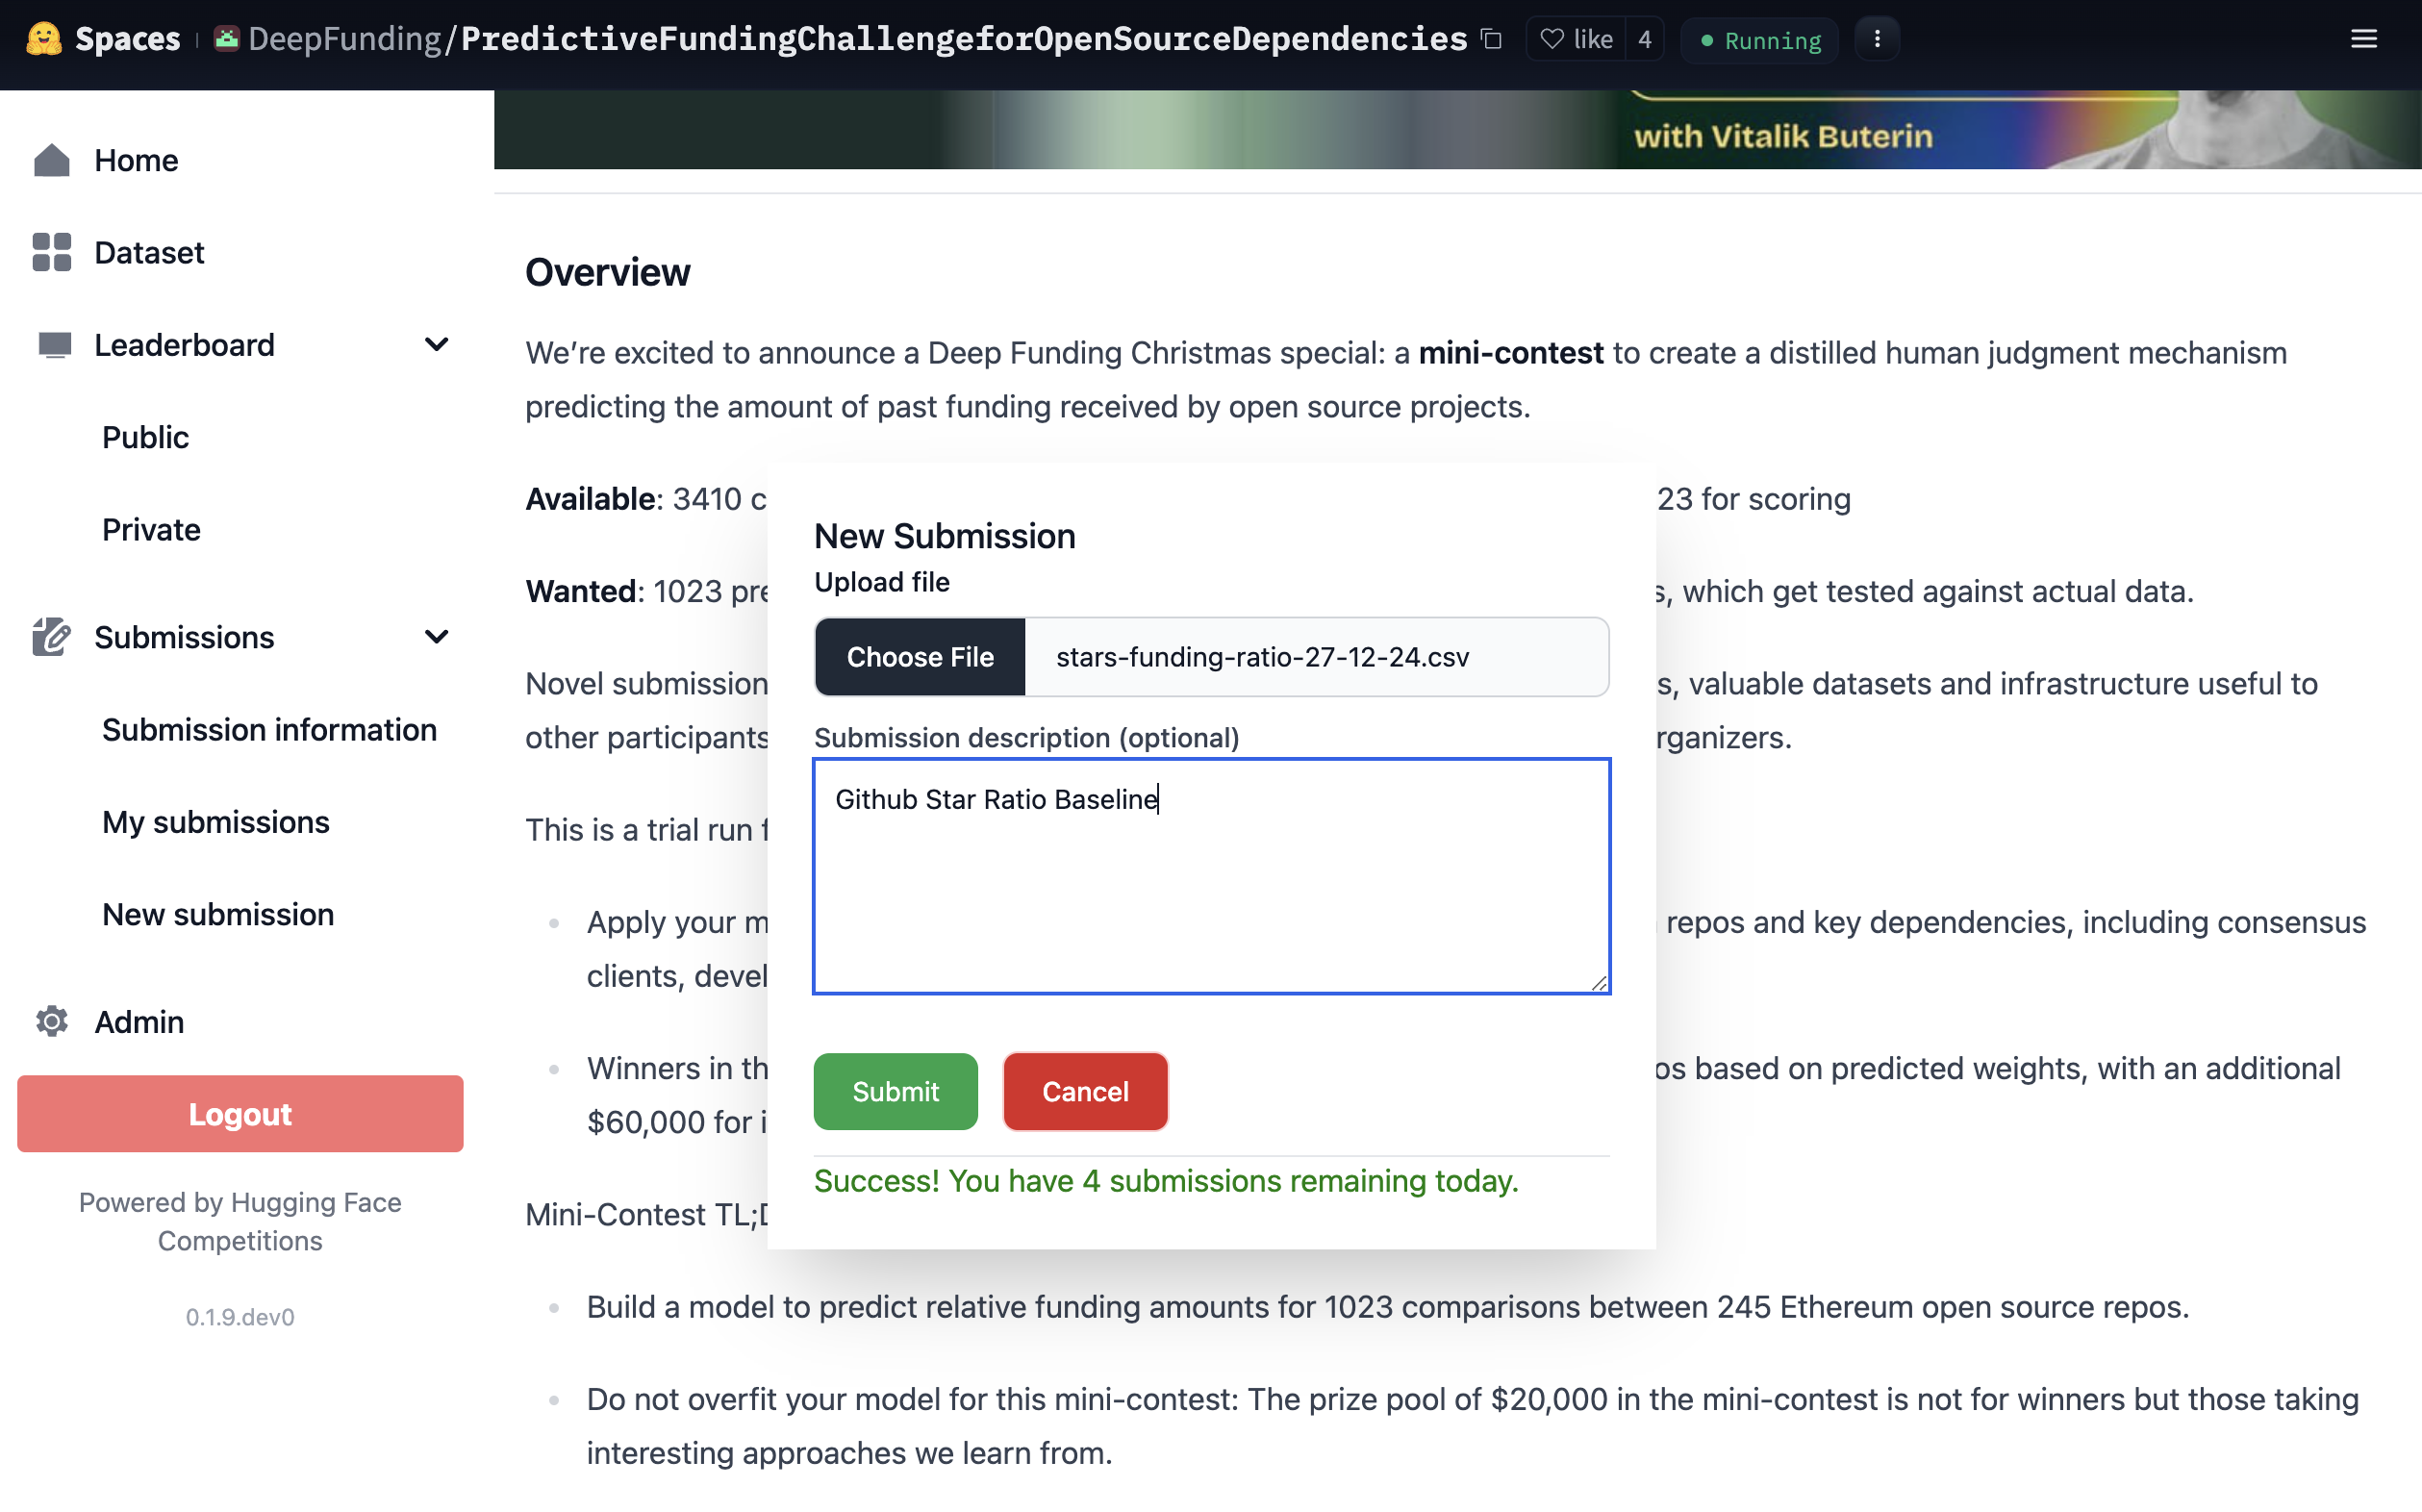

Congratulations for your first submission!

Below you can find more ressources to get engaged

### 📚 Resources

- [Official Website](https://deepfunding.org) - [FAQ](https://deepfunding.org/faq)
- [GitHub Repository](https://github.com/deepfunding/dependency-graph)
- [HuggingFace Competition](https://huggingface.co/spaces/DeepFunding/PredictiveFundingChallengeforOpenSourceDependencies)
- [HuggingFace EvalScience Dataset](https://huggingface.co/datasets/evalscience/deepfunding-mini)
- [Demo of the Voting UI](https://pairwise-df-demo.vercel.app/allocation)
- [Deep Funding Podcast](https://www.youtube.com/watch?v=ygaEBHYllPU)
- [Dependecy Graph Visualisation](https://cosmograph.app/run/?data=https://raw.githubusercontent.com/opensource-observer/insights/refs/heads/main/community/deep_funder/data/unweighted_graph.csv&source=seed_repo_name&target=package_repo_name&gravity=0.25&repulsion=1&repulsionTheta=1&linkSpring=1&linkDistance=10&friction=0.1&renderLabels=true&renderHoveredLabel=true&renderLinks=true&linkArrows=true&curvedLinks=true&nodeSizeScale=0.5&linkWidthScale=1&linkArrowsSizeScale=1&nodeSize=size-default&nodeColor=color-outgoing%20links&linkWidth=width-number%20of%20data%20records&linkColor=color-number%20of%20data%20records&)
- [Telegram Group](https://t.me/AgentAllocators)

### 🙌 Community Repos

https://github.com/davidgasquez/predictive-funding-challenge/